# Homework 3

Zgodnie z ustaleniami na początku semestru, na koniec części Python w tym repozytorium zawarłem wszystkie (Python) trzy prace domowe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

### Opis merytoryki zbioru danych

Oto opis danych zawartych w pliku "Car details v3.csv":

Zbiór danych zawiera informacje o różnych samochodach. Zawiera on następujące kolumny:

- `name`: Nazwa samochodu.
- `year`: Rok produkcji samochodu.
- `selling_price`: Cena sprzedaży samochodu.
- `km_driven`: Całkowity dystans przejechany przez samochód w kilometrach.
- `fuel`: Rodzaj paliwa używanego przez samochód (np. benzyna, olej napędowy, CNG).
- `seller_type`: Typ sprzedawcy (np. Indywidualny, Dealer).
- `transmission`: Typ skrzyni biegów (np. manualna, automatyczna).
- `owner`: Liczba poprzednich właścicieli samochodu.
- `mileage`: Spalanie samochodu w kilometrach na litr.
- `engine`: Pojemność silnika samochodu w centymetrach sześciennych.
- `max_power`: Maksymalna moc wyjściowa samochodu w KM (konie mechaniczne).
- `seats`: Liczba miejsc w samochodzie.

Naszym celem w przypadku tego zbioru danych jest analiza i eksploracja szczegółów samochodu w celu uzyskania wglądu i podejmowania świadomych decyzji. Możemy wykonywać różne zadania, takie jak czyszczenie danych, wizualizacja danych, analiza statystyczna i modelowanie uczenia maszynowego, aby wydobyć cenne informacje ze zbioru danych.

### Statystyki opisowe zmiennych


W tej sekcji analizujemy statystyki opisowe dla zmiennych w naszym zbiorze danych. Statystyki opisowe to liczby i miary, które opisują rozkład, tendencję centralną, rozproszenie i kształt danych.

Korzystając z metody `describe()` w bibliotece pandas, możemy uzyskać podstawowe statystyki dla zmiennych numerycznych, takie jak:
- Liczba obserwacji (count)
- Średnia (mean)
- Odchylenie standardowe (std)
- Minimum (min)
- Kwartyle (25%, 50%, 75%)
- Maksimum (max)

Przykładowo, jeśli mamy zmienną "selling_price" reprezentującą cenę sprzedaży samochodu, możemy użyć metody `describe()` dla tej zmiennej, aby uzyskać informacje takie jak średnia cena, minimalna cena, maksymalna cena itp.


In [2]:
car_vehicles: pd.DataFrame = pd.read_csv("Car details v3.csv")

In [3]:
car_vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
car_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
car_vehicles.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
car_vehicles.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### Tidy data

W sekcji "Tidy data" przeprowadzono operacje mające na celu uporządkowanie danych w zbiorze. Pierwszym krokiem było usunięcie wierszy zawierających brakujące dane. Następnie, wartości parami numeryczne zostały zamienione na wartości liczbowe. Funkcja `leave_only_digits` została zastosowana do przekształcenia wartości tekstowych na liczbowe dla kolumn "mileage", "engine" i "max_power". Wartości tekstowe, takie jak "Diesel", "Petrol" itp., zostały zamienione na odpowiadające im liczby, aby umożliwić dalszą analizę i modelowanie.

In [7]:
car_vehicles.drop(['torque', 'seats'], axis=1, inplace=True)

In [8]:
car_vehicles.dropna(inplace=True)

Zmiana wartości paranumerycznych na numeryczne

In [9]:
def leave_only_digits(val):
    if isinstance(val, float):
        return val
    elif val.strip() == '':
        return None
    else:
        try:
            return float(val.split(' ')[0])
        except (ValueError, IndexError):
            return None


In [10]:
car_vehicles[['mileage', 'engine', 'max_power']] = car_vehicles[['mileage', 'engine', 'max_power']].applymap(leave_only_digits)
car_vehicles

/tmp/ipykernel_16413/71214437.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  car_vehicles[['mileage', 'engine', 'max_power']] = car_vehicles[['mileage', 'engine', 'max_power']].applymap(leave_only_digits)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00


In [11]:
car_vehicles['fuel'] = car_vehicles['fuel'].astype('category').cat.codes
car_vehicles['seller_type'] = car_vehicles['seller_type'].astype('category').cat.codes
car_vehicles['transmission'] = car_vehicles['transmission'].astype('category').cat.codes
car_vehicles['owner'] = car_vehicles['owner'].astype('category').cat.codes

car_vehicles

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,3,1,1,0,18.50,1197.0,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,1,16.80,1493.0,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,0,19.30,1248.0,73.90
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,0,23.57,1396.0,70.00


In [12]:
car_vehicles.dropna(inplace=True)

### Wykresy rozkładu oraz korelacji zmienych

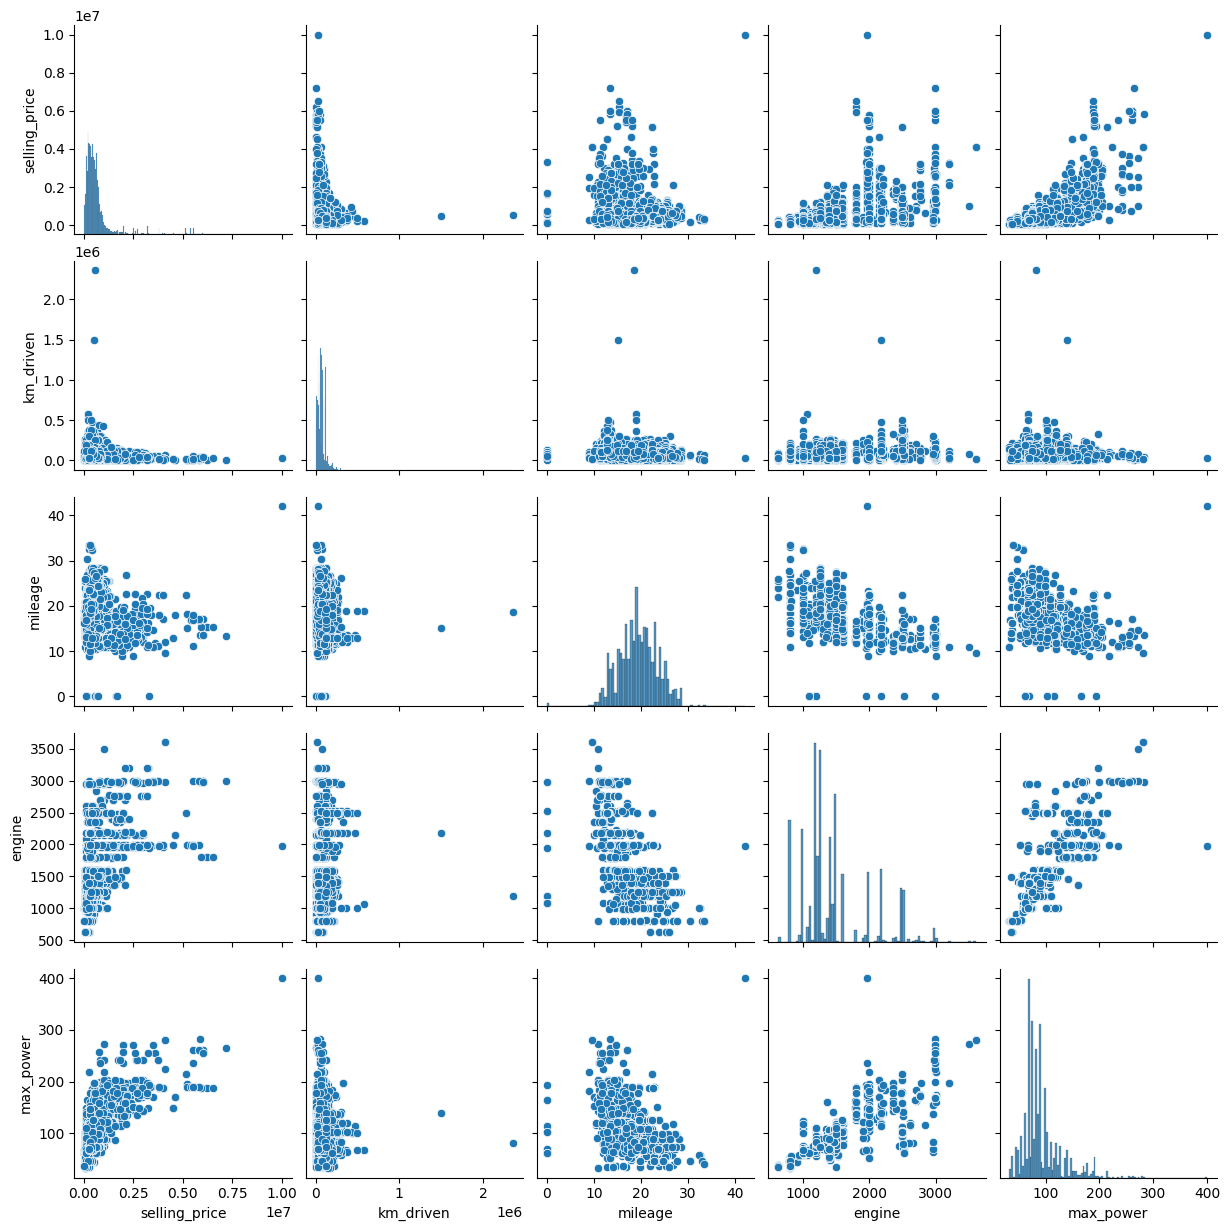

In [13]:
sns.pairplot(car_vehicles[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']])

/tmp/ipykernel_16413/2940990897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_vehicles['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

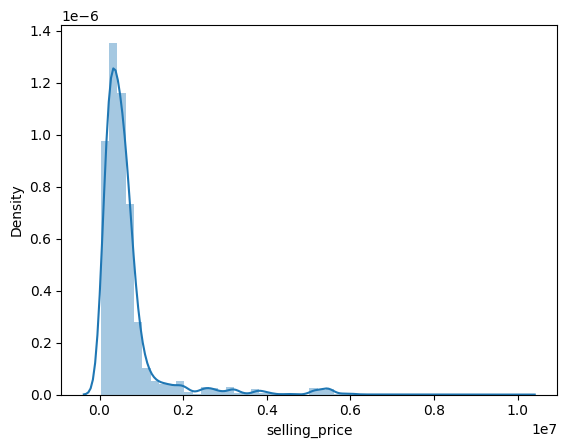

In [14]:
sns.distplot(car_vehicles['selling_price'])

<Axes: >

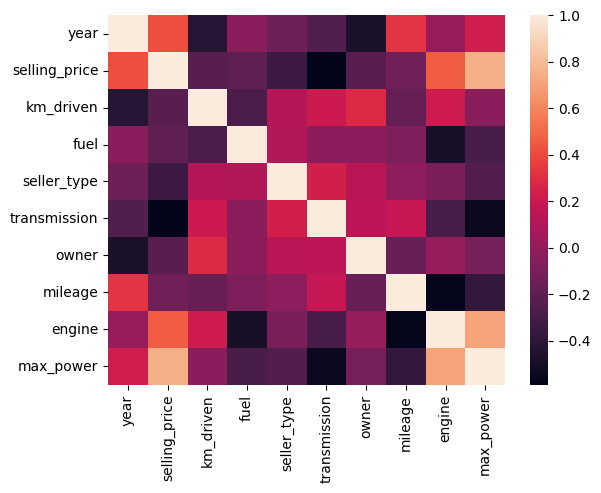

In [15]:
numeric_df = car_vehicles.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

### Modele zbudowane za pomocą: statmodels oraz sklearn

W sekcji "Modele zbudowane za pomocą: statmodels oraz sklearn" przeprowadzono analizę i budowę modeli regresji liniowej za pomocą dwóch popularnych bibliotek: statmodels i sklearn.

Najpierw, dane zostały podzielone na zbiór treningowy i testowy za pomocą funkcji `train_test_split` z biblioteki sklearn. Następnie, na zbiorze treningowym został zbudowany model regresji liniowej za pomocą klasy `LinearRegression` z biblioteki sklearn. Model ten został dopasowany do danych treningowych za pomocą metody `fit()`. 

Po zbudowaniu modelu, zostały wyświetlone współczynniki regresji, które reprezentują wpływ poszczególnych zmiennych niezależnych na zmienną zależną. Wartości te zostały przedstawione w postaci tabeli za pomocą biblioteki pandas.

Dodatkowo, został zbudowany model regresji liniowej za pomocą klasy `OLS` z biblioteki statmodels. Model ten również został dopasowany do danych treningowych, a następnie zostały wygenerowane statystyki opisujące jakość dopasowania modelu, takie jak wartość R-kwadrat, współczynniki istotności poszczególnych zmiennych oraz inne miary statystyczne.

Na koniec, zostały dokonane predykcje na zbiorze testowym za pomocą zbudowanych modeli. Wyniki predykcji zostały porównane z rzeczywistymi wartościami zmiennych zależnych, a następnie zostały obliczone miary oceny jakości predykcji, takie jak średni błąd bezwzględny (MAE) i pierwiastek błędu średniokwadratowego (RMSE). 

Wszystkie te kroki mają na celu zrozumienie i ocenę jakości modeli regresji liniowej oraz ich zdolności do przewidywania wartości zmiennej zależnej na podstawie dostępnych zmiennych niezależnych.

In [16]:
x = car_vehicles[['km_driven', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']]
y = car_vehicles['selling_price']

In [17]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [18]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [19]:
print(lm.intercept_)

-68568335.37154646


In [20]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
km_driven,-0.890932
year,33875.000098
fuel,-4337.157922
seller_type,-228133.481211
transmission,-448006.646284
owner,-4112.207432
mileage,17247.956448
engine,56.401673
max_power,13572.201306


In [21]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          selling_price   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              3422.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:29:51   Log-Likelihood:                     -1.1448e+05
No. Observations:                7906   AIC:                                  2.290e+05
Df Residuals:                    7897   BIC:                                  2.290e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
km_driven       -1.7038      0.106    -16.126      0.000      -1.911      -1.497
year          -232.3575     37.979     -6.118      0.000    -306.807    -157.908
fuel         -1.092e+04   7481.469     -1.459      0.144   -2.56e+04    3747.185
seller_type  -2.174e+05   1.41e+04    -15.378      0.000   -2.45e+05    -1.9e+05
transmission -5.208e+05   1.95e+04    -26.658      0.000   -5.59e+05   -4.82e+05
owner        -3.947e+04   4703.549     -8.392      0.000   -4.87e+04   -3.03e+04
mileage       2.783e+04   1957.708     14.218      0.000     2.4e+04    3.17e+04
engine          95.2146     21.459      4.437      0.000      53.149     137.281
max_power     1.369e+04    248.181     55.161      0.000    1.32e+04    1.42e+04
==============================================================================
Omnibus:                     4054.635   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70336.262
Skew:                           2.050   Prob(JB):                         0.00
Kurtosis:                      17.025   Cond. No.                     3.33e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predykcje i ocenę dopasowania na zbiorze testowym - wykres + miary MAE, RMSE

In [22]:
predictions = lm.predict(x_test)

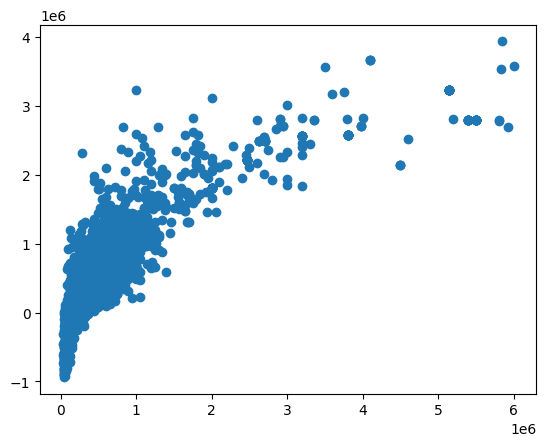

In [23]:
plt.scatter(y_test,predictions)

/tmp/ipykernel_16413/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


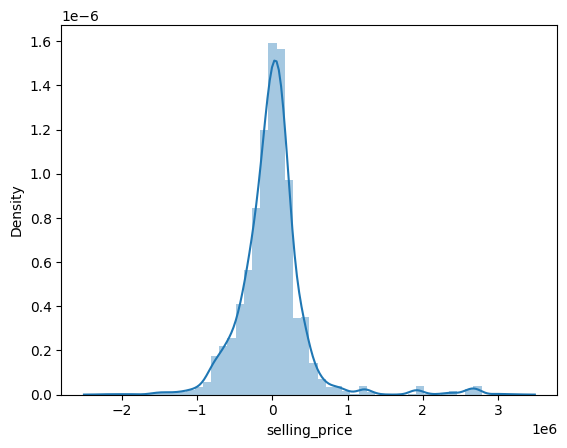

In [24]:
sns.distplot((y_test-predictions),bins=50);

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 277205.34444876533
RMSE: 454035.59036036447


In [26]:
predictions_statsmodels = results.predict(x_test)

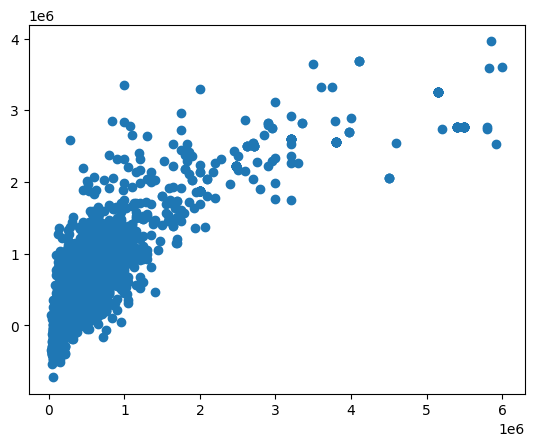

In [27]:
plt.scatter(y_test, predictions_statsmodels)

/tmp/ipykernel_16413/1912367163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions_statsmodels),bins=50);


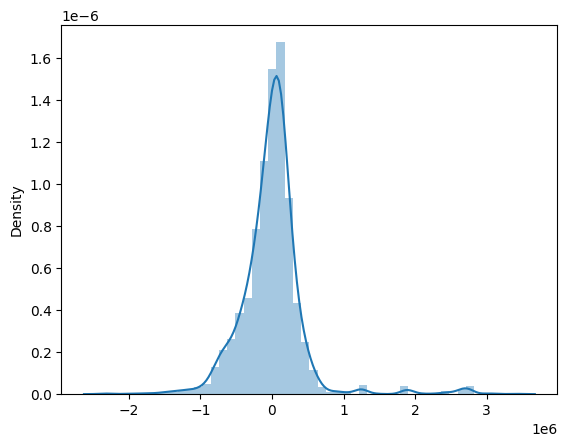

In [28]:
sns.distplot((y_test-predictions_statsmodels),bins=50);

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_statsmodels))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_statsmodels)))

MAE: 279968.07657780946
RMSE: 459311.6542147669


### Interpretacja oszacowań modelu oraz własności statystycznych modelu

W sekcji "Interpretacja oszacowań modelu oraz własności statystycznych modelu" przeprowadzono analizę i interpretację wyników zbudowanych modeli regresji liniowej.

Na początku, zostały wyświetlone współczynniki regresji dla każdej zmiennej niezależnej w modelu. Współczynniki te reprezentują wpływ poszczególnych zmiennych na zmienną zależną. Dodatnie wartości współczynników oznaczają, że wzrost wartości danej zmiennej niezależnej jest związany ze wzrostem wartości zmiennej zależnej, podczas gdy ujemne wartości współczynników oznaczają, że wzrost wartości danej zmiennej niezależnej jest związany ze spadkiem wartości zmiennej zależnej.

Następnie, zostały wygenerowane statystyki opisujące jakość dopasowania modelu. Wartość R-kwadrat jest miarą, która wskazuje, jak dobrze model pasuje do danych. Wartość R-kwadrat wynosząca blisko 1 oznacza, że model bardzo dobrze wyjaśnia zmienność danych, podczas gdy wartość bliska 0 oznacza, że model nie wyjaśnia znaczącej części zmienności danych.

Dodatkowo, w tabeli wyników zostały przedstawione inne miary statystyczne, takie jak wartości p dla współczynników regresji. P jest miarą istotności statystycznej współczynnika regresji. Niska wartość p (zazwyczaj mniejsza niż 0,05) wskazuje, że współczynnik jest istotny statystycznie i ma znaczący wpływ na zmienną zależną.

W sekcji "Predykcje i ocena dopasowania na zbiorze testowym" zostały dokonane predykcje na zbiorze testowym za pomocą zbudowanych modeli. Wyniki predykcji zostały porównane z rzeczywistymi wartościami zmiennych zależnych, a następnie zostały obliczone miary oceny jakości predykcji, takie jak średni błąd bezwzględny (MAE) i pierwiastek błędu średniokwadratowego (RMSE). 

MAE jest miarą, która określa średnią wartość bezwzględną różnicy między rzeczywistymi wartościami a przewidywanymi wartościami. Im niższa wartość MAE, tym lepsza jakość predykcji. RMSE jest miarą, która określa pierwiastek średniego błędu kwadratowego między rzeczywistymi wartościami a przewidywanymi wartościami. Im niższa wartość RMSE, tym lepsza jakość predykcji.

Wszystkie te kroki mają na celu zrozumienie i ocenę jakości modeli regresji liniowej oraz ich zdolności do przewidywania wartości zmiennej zależnej na podstawie dostępnych zmiennych niezależnych. Interpretacja wyników modelu oraz analiza statystyczna są kluczowe dla podejmowania świadomych decyzji na podstawie wyników modelu regresji liniowej.